In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sn
from scipy import stats

In [2]:
df_1 = pd.read_csv("3100_dec.csv")
df_2= pd.read_csv("3100_nov.csv")
df_3 = pd.read_csv("3100_oct.csv")

In [5]:
df_1 = df_1.drop("Unnamed: 2", axis =1)

In [13]:
frames = ['hour','outflow','Inflow', 'freq','count','weekday','workingday','weathersit','temp','hum','windspeed' ]
df_1 = df_1[frames]


In [14]:
df_1.head()

,hour,outflow,Inflow,freq,count,weekday,workingday,weathersit,temp,hum,windspeed
0,0,0,0,0,20,5.0,1.0,2.0,0.24,0.6,0.1642
1,1,0,0,0,20,5.0,1.0,1.0,0.24,0.6,0.1940
2,2,0,0,0,20,5.0,1.0,1.0,0.24,0.6,0.2537
3,3,0,0,0,20,5.0,1.0,2.0,0.24,0.6,0.1642
4,4,0,0,0,20,5.0,1.0,2.0,0.24,0.6,0.1045


In [25]:
df_2.shape

(720, 11)

In [20]:
df_3 =df_3.drop('Unnamed: 0', axis  =1)

In [8]:
df_2  =df_2.drop("Unnamed: 0", axis =1)

In [22]:
df_final  = pd.concat([df_1,df_2,df_3], axis =0)
#df_final = df_final.drop("Unnamed: 0", axis  =1)

In [27]:
df_final.reset_index(drop =True, inplace =True)
df_final.tail()

,hour,outflow,Inflow,freq,count,weekday,workingday,weathersit,temp,hum,windspeed
2179,19,0,1,-1,20,1.0,1.0,2.0,0.54,0.68,0.1045
2180,20,0,0,0,20,1.0,1.0,3.0,0.54,0.68,0.0000
2181,21,0,0,0,20,1.0,1.0,2.0,0.54,0.73,0.1343
2182,22,0,0,0,20,1.0,1.0,3.0,0.54,0.77,0.0896
2183,23,0,0,0,20,1.0,1.0,3.0,0.54,0.77,0.0000


In [34]:
frames  =['outflow','Inflow','freq']
df_final = df_final.drop(frames, axis =1 )

In [46]:
df_final.head()
df_final.to_csv("df_final.csv")

In [ ]:
#Visualizations 

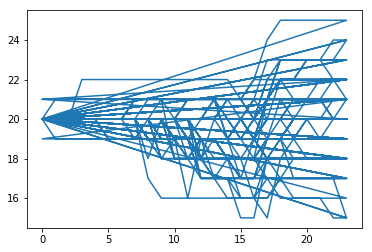

In [28]:
y = df_final["count"]
x = df_final["hour"]

plt.plot(x,y)

[Text(0,0.5,'Count'),
 Text(0.5,0,'Working Day'),
 Text(0.5,1,'Box Plot On Count Across Working Day')]

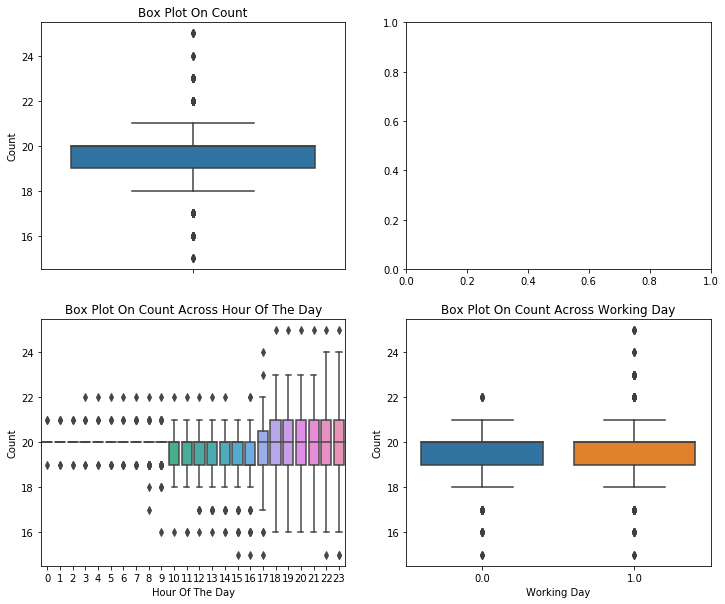

In [52]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data = df_final,y="count",orient="v",ax=axes[0][0])
sn.boxplot(data =df_final,y="count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data =df_final,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

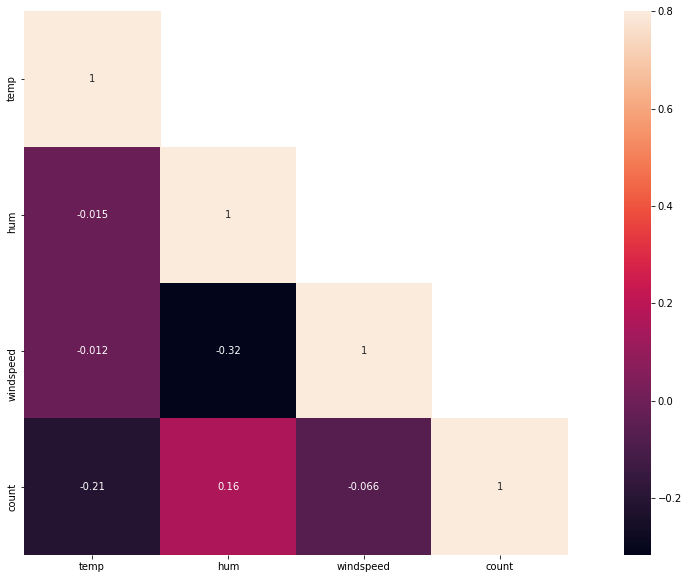

In [44]:
corrMatt = df_final[["temp","hum","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

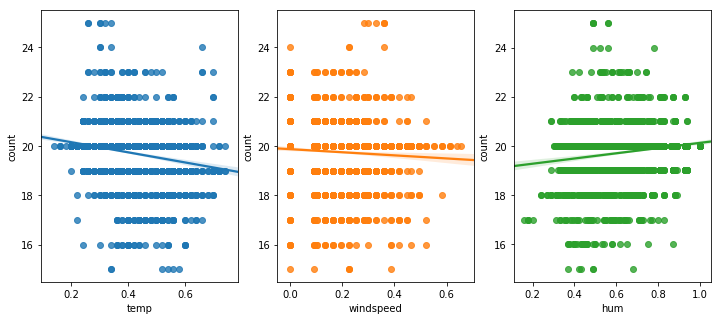

In [45]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=df_final,ax=ax1)
sn.regplot(x="windspeed", y="count", data=df_final,ax=ax2)
sn.regplot(x="hum", y="count", data=df_final,ax=ax3)

((array([-3.41635718, -3.1669452 , -3.02869915, ...,  3.02869915,
          3.1669452 ,  3.41635718]), array([15, 15, 15, ..., 25, 25, 25])),
 (1.02874929695575, 19.757326007326007, 0.9016197887984833))

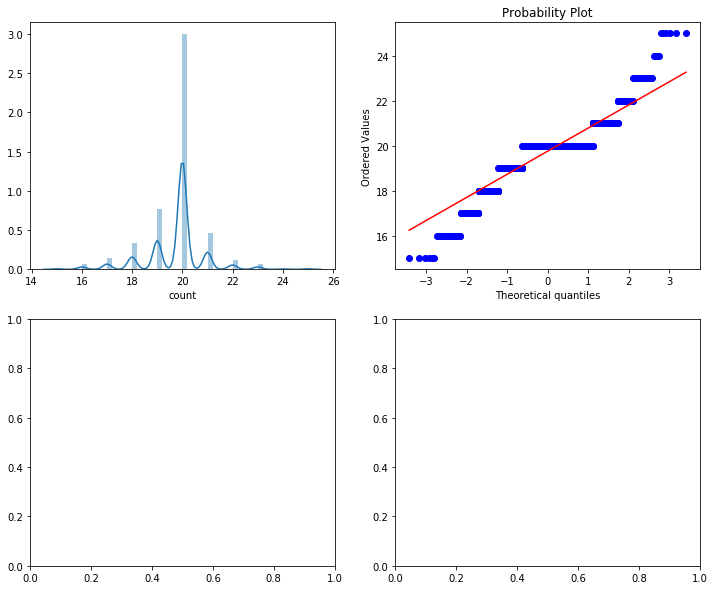

In [50]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sn.distplot(df_final["count"],ax=axes[0][0])
stats.probplot(df_final["count"], dist='norm', fit=True, plot=axes[0][1])